Creacion del grafo dada la lista de coordenadas

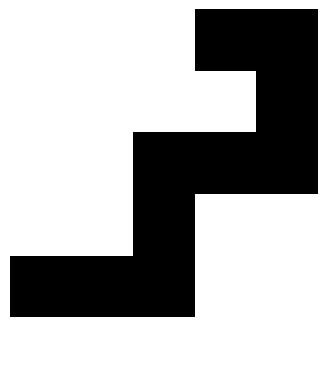

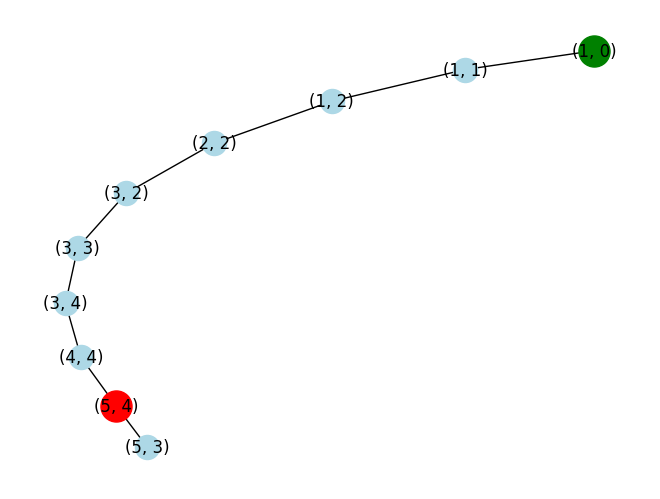

Nodo de inicio: (1, 0)
Nodo de fin: (5, 4)


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def create_maze(coords):
    max_x = max(coord[0] for coord in coords)
    max_y = max(coord[1] for coord in coords)

    maze = [[1] * (max_y + 1) for _ in range(max_x + 1)]

    for coord in coords:
        x, y = coord
        maze[x][y] = 0

    return maze

def draw_maze(maze):
    plt.imshow(maze, cmap='gray', origin='lower')
    plt.axis('off')
    plt.show()

def maze_to_graph(maze):
    G = nx.Graph()

    rows = len(maze)
    cols = len(maze[0])

    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 0:
                G.add_node((i, j))

    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 0:
                if i + 1 < rows and maze[i + 1][j] == 0:
                    G.add_edge((i, j), (i + 1, j))
                if j + 1 < cols and maze[i][j + 1] == 0:
                    G.add_edge((i, j), (i, j + 1))

    return G

def find_start_end_nodes(maze):
    start = None
    end = None

    rows = len(maze)
    cols = len(maze[0])

    # Find start and end nodes
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 0:
                if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
                    if start is None:
                        start = (i, j)
                    else:
                        end = (i, j)

    return start, end

def draw_graph(G, start, end):
    pos = nx.spring_layout(G)
    node_labels = {node: str(node) for node in G.nodes()}
    
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue')
    nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='green', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=[end], node_color='red', node_size=500)
    plt.show()
    
    print("Nodo de inicio:", start)
    print("Nodo de fin:", end)


# Lista de coordenadas para crear el laberinto
coords = [(1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (5, 4), (5, 3)]

# Crear el laberinto a partir de las coordenadas
maze = create_maze(coords)

# Mostrar el laberinto
draw_maze(maze)

# Convertir el laberinto en un grafo
G = maze_to_graph(maze)

# Encontrar el nodo de inicio y el nodo de fin
start, end = find_start_end_nodes(maze)

# Dibujar el grafo
draw_graph(G, start, end)


   
 # 
   
